# ADS Final Project
## by Pritam Channawar


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings("ignore")

/Users/ramtuptewar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Information of Dataset

In [2]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from matplotlib.axes import Axes

sns.set_palette("autumn")

mpl.rc("axes", titlesize=18, titlepad=15, titleweight=500)
mpl.rc("axes.spines", right=False, top=False)
mpl.rc("figure", figsize=(10, 5.5))
mpl.rc("font", family="serif", size=10)


def annotate_column_chart(ax: Axes) -> Axes:
    """Add annotations to a column chart.
    
    Args:
        ax (matplotlib.axes.Axes): A column chart.
    
    Returns:
        matplotlib.axes.Axes: Annotated column chart.
    """
    for p in ax.patches:
        p.set_width(0.7)
        ax.annotate(f"{p.get_height():,}", ha="center",
                xy=(p.get_x() + p.get_width() / 2, p.get_height() * 1.01))
    return ax

sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_columns', 75)
data = pd.read_csv(
    "Market_Basket_Optimisation.csv",
    header=None,
    names=[f"item_{idx}" for idx in range(1, 21)]
)

print(
    f"There were a total of {data.shape[0]:,} transactions, each containing",
    f"between {data.notna().sum(axis=1).min()} and {data.shape[1]} items.\n"
)
data.head()

There were a total of 7,501 transactions, each containing between 1 and 20 items.



,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_20
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_columns', 75)
data = pd.read_csv('Market_Basket_Optimisation.csv', header = None)

In [4]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [5]:
data.apply(lambda x: [x.unique()])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,"[shrimp, burgers, chutney, turkey, mineral wat...","[almonds, meatballs, nan, avocado, milk, frenc...","[avocado, eggs, nan, energy bar, shallot, gree...","[vegetables mix, nan, whole wheat rice, eggs, ...","[green grapes, nan, green tea, cooking oil, oi...","[whole weat flour, nan, cooking oil, black tea...","[yams, nan, low fat yogurt, salmon, shampoo, w...","[cottage cheese, nan, eggs, toothpaste, frozen...","[energy drink, nan, chicken, escalope, soup, e...","[tomato juice, nan, extra dark chocolate, milk...","[low fat yogurt, nan, olive oil, eggs, pancake...","[green tea, nan, salt, low fat yogurt, fresh b...","[honey, nan, fresh bread, hot dogs, low fat yo...","[salad, nan, green tea, hot dogs, salt, mint, ...","[mineral water, nan, cereals, salmon, candy ba...","[salmon, nan, chocolate, antioxydant juice, fr...","[antioxydant juice, nan, frozen smoothie, fren...","[frozen smoothie, nan, protein bar, spinach]","[spinach, nan, mayonnaise, cereals]","[olive oil, nan]"


In [6]:
data.shape

(7501, 20)

# Data Cleaning

In [7]:
all_products = data.melt()["value"].dropna().sort_values()

# Find items that start or end with whitespace
all_products[all_products.str.contains("^\s|\s$")].to_list()

[' asparagus']

In [8]:
data.replace(" asparagus", "asparagus", inplace=True)
all_products.replace(" asparagus", "asparagus", inplace=True)

print(f"There are {all_products.nunique()} different products:\n\n", all_products.unique())

There are 119 different products:

 ['asparagus' 'almonds' 'antioxydant juice' 'avocado' 'babies food' 'bacon'
 'barbecue sauce' 'black tea' 'blueberries' 'body spray' 'bramble'
 'brownies' 'bug spray' 'burger sauce' 'burgers' 'butter' 'cake'
 'candy bars' 'carrots' 'cauliflower' 'cereals' 'champagne' 'chicken'
 'chili' 'chocolate' 'chocolate bread' 'chutney' 'cider'
 'clothes accessories' 'cookies' 'cooking oil' 'corn' 'cottage cheese'
 'cream' 'dessert wine' 'eggplant' 'eggs' 'energy bar' 'energy drink'
 'escalope' 'extra dark chocolate' 'flax seed' 'french fries'
 'french wine' 'fresh bread' 'fresh tuna' 'fromage blanc'
 'frozen smoothie' 'frozen vegetables' 'gluten free bar' 'grated cheese'
 'green beans' 'green grapes' 'green tea' 'ground beef' 'gums' 'ham'
 'hand protein bar' 'herb & pepper' 'honey' 'hot dogs' 'ketchup'
 'light cream' 'light mayo' 'low fat yogurt' 'magazines' 'mashed potato'
 'mayonnaise' 'meatballs' 'melons' 'milk' 'mineral water' 'mint'
 'mint green tea' 'muffi

# EDA

## Best-selling products

Assuming that only one unit of each item was bought in each transaction, mineral water is the most purchased product.

The top selling products are primarily food-stuff, but that's not at all surprising.

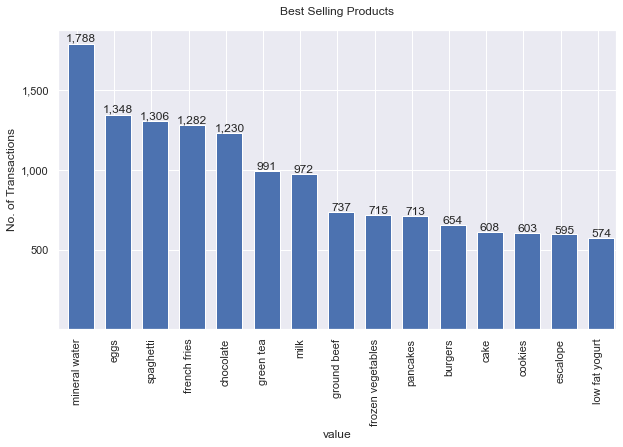

In [9]:
item_counts = all_products.value_counts()

ax = item_counts.nlargest(15).plot(kind="bar", title="Best Selling Products")
ax.set_ylabel("No. of Transactions", size=12)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f}"))
ax.yaxis.set_major_locator(mpl.ticker.FixedLocator([500, 1000, 1500]))

_ = annotate_column_chart(ax)


## Worst performing products
Assuming that only one unit of each item was bought in each transaction, water spray is sold the least.

It is quite unusual that the tea, chocolate bread and sandwiches are doing badly. This is worth investigating. Assuming th

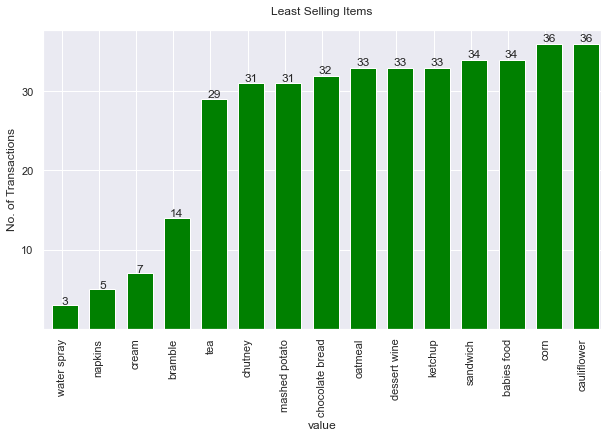

In [10]:
import matplotlib as mpl

item_counts = all_products.value_counts()
ax = item_counts.nsmallest(15).plot(kind="bar", color="green", title="Least Selling Items")
ax.set_ylabel("No. of Transactions", size=12)
ax.yaxis.set_major_locator(mpl.ticker.FixedLocator([10, 20, 30]))

_ = annotate_column_chart(ax)

# Network Graph representation

In [11]:
import networkx as nx
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)
food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

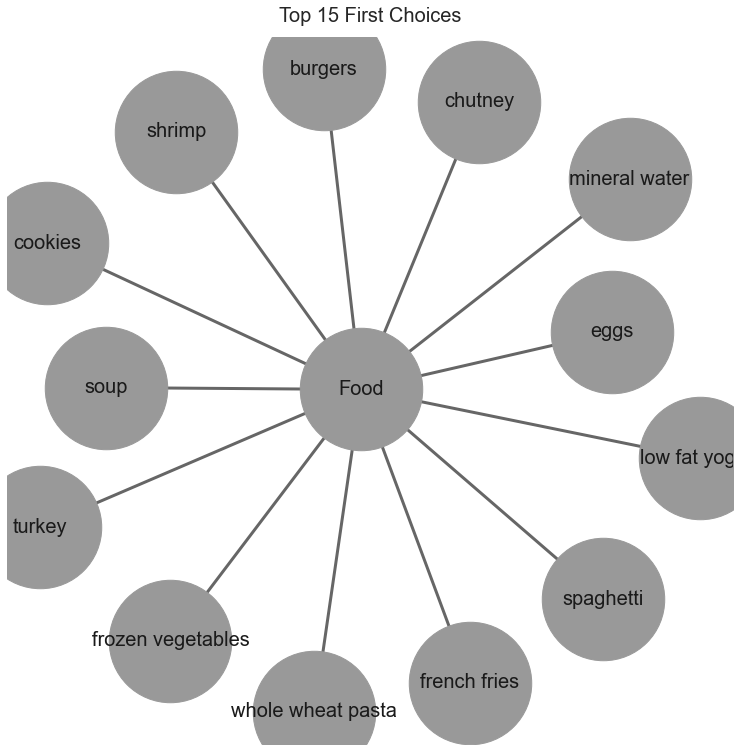

In [12]:
plt.rcParams['figure.figsize'] = (13, 13)
pos = nx.spring_layout(food)
color = plt.cm.Set1(np.linspace(5, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 20)
plt.show()

## Distribution of Basket sizes
The average basket-size was about 4 items. The largest transaction consisted of 20 items, and the smallest had just one.

Majority of the transactions involved a single item.

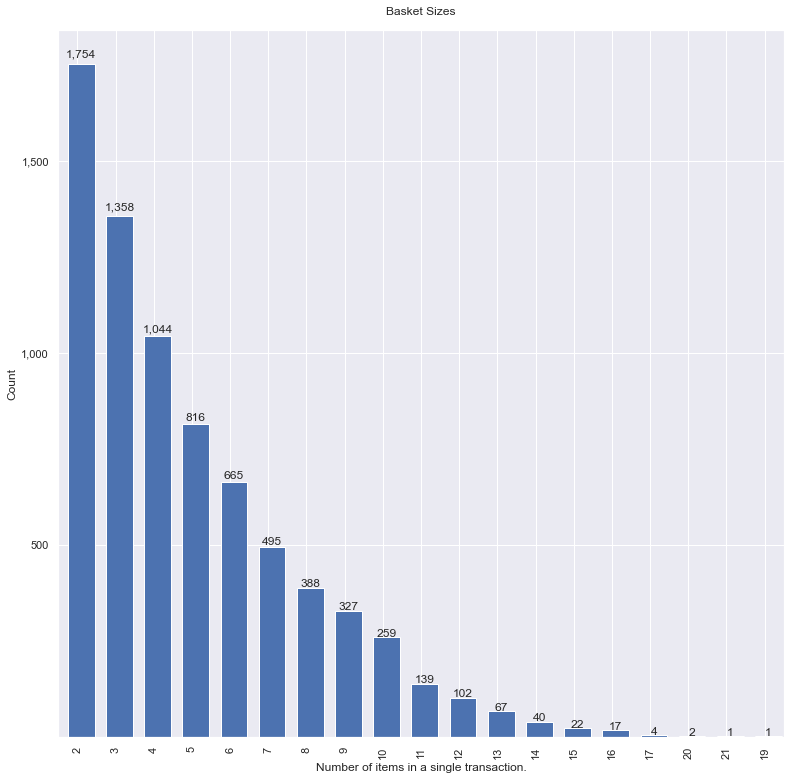

In [13]:
basket_sizes = data.notna().apply(sum, axis=1)

ax = basket_sizes.value_counts().plot.bar(title="Basket Sizes")
ax.set_ylabel("Count")
ax.set_xlabel("Number of items in a single transaction.")
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f}"))
ax.yaxis.set_major_locator(mpl.ticker.FixedLocator([500, 1000, 1500]))

_ = annotate_column_chart(ax)

In [14]:
basket_sizes.describe()

count    7501.000000
mean        4.914545
std         2.905540
min         2.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        21.000000
dtype: float64

In [15]:
# Getting the list of transactions from the dataset
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])

In [16]:
transactions[:1]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil',
  'Food']]

## What's in the largest transactions?
We'll consider transactions having more than 15 items (75% of maximum=20) as "large". There are 8 such transactions (16, 16, 16, 16, 18, 19, 19, 20).

Spaghetti and salmon are in 6 out of the eight largest transactions. Salmon's case is more striking, since we've already seen that spaghetti is the 3rd best seller. At face value, this might imply that customers who purchase a lot of items are more likely to buy salmon, so placing it next to the large trolleys/shopping-baskets might boost sales. But 8 out of 7501 cases doesn't inspire much confidence.

In [17]:
items_in_largest_transactions = data[basket_sizes > 15].melt()['value'].dropna()
items_in_largest_transactions

0                 shrimp
1             fresh tuna
2             fresh tuna
3      frozen vegetables
4           dessert wine
             ...        
520                 Food
521                 Food
522                 Food
523                 Food
524                 Food
Name: value, Length: 420, dtype: object

# Preprocessing
Data input to the efficient-apriori.apriori function is required as a sequence of "baskets" e.g. a list of tuples containing items.

In order to find item relationships, the baskets must include more than 1 item. We'll need to discard singleton transactions.

In [18]:
#discard single transactions
baskets = [tuple(row.dropna()) for _, row in data[basket_sizes > 1].iterrows()]
baskets[-5:]

[('butter', 'light mayo', 'fresh bread', 'Food'),
 ('burgers',
  'frozen vegetables',
  'eggs',
  'french fries',
  'magazines',
  'green tea',
  'Food'),
 ('chicken', 'Food'),
 ('escalope', 'green tea', 'Food'),
 ('eggs', 'frozen smoothie', 'yogurt cake', 'low fat yogurt', 'Food')]

# Association rules

In [19]:
from efficient_apriori import apriori

item_sets, association_rules = apriori(baskets, min_support=0.03, min_confidence=0.3)

# Get 1 to 1 rules e.g. {bread} -> {butter}
one_to_one_rules = filter(
    lambda rule: len(rule.lhs) == 1 and len(rule.rhs) == 1, association_rules
)
for rule in sorted(one_to_one_rules, key=lambda rule: rule.lift):
    print(rule)

{avocado} -> {Food} (conf: 1.000, supp: 0.033, lift: 1.000, conv: 0.000)
{brownies} -> {Food} (conf: 1.000, supp: 0.034, lift: 1.000, conv: 0.000)
{burgers} -> {Food} (conf: 1.000, supp: 0.087, lift: 1.000, conv: 0.000)
{butter} -> {Food} (conf: 1.000, supp: 0.030, lift: 1.000, conv: 0.000)
{cake} -> {Food} (conf: 1.000, supp: 0.081, lift: 1.000, conv: 0.000)
{champagne} -> {Food} (conf: 1.000, supp: 0.047, lift: 1.000, conv: 0.000)
{chicken} -> {Food} (conf: 1.000, supp: 0.060, lift: 1.000, conv: 0.000)
{chocolate} -> {Food} (conf: 1.000, supp: 0.164, lift: 1.000, conv: 0.000)
{cookies} -> {Food} (conf: 1.000, supp: 0.080, lift: 1.000, conv: 0.000)
{cooking oil} -> {Food} (conf: 1.000, supp: 0.051, lift: 1.000, conv: 0.000)
{cottage cheese} -> {Food} (conf: 1.000, supp: 0.032, lift: 1.000, conv: 0.000)
{eggs} -> {Food} (conf: 1.000, supp: 0.180, lift: 1.000, conv: 0.000)
{escalope} -> {Food} (conf: 1.000, supp: 0.079, lift: 1.000, conv: 0.000)
{french fries} -> {Food} (conf: 1.000, su

In [20]:
#!pip -qq install efficient-apriori

In [21]:
from itertools import permutations

# Extract unique items.
flattened = [item for transaction in transactions for item in transaction]
items = list(set(flattened))

In [22]:
print('# of items:',len(items))
print(list(items))


# of items: 121
['tomatoes', 'salad', 'mushroom cream sauce', 'grated cheese', 'muffins', 'whole weat flour', 'Food', 'asparagus', 'cereals', 'chili', 'chicken', 'tomato juice', 'oil', 'red wine', 'hand protein bar', 'almonds', 'sandwich', 'napkins', 'white wine', 'chocolate bread', 'energy bar', 'candy bars', 'babies food', 'shampoo', 'mint', 'pasta', 'mint green tea', 'extra dark chocolate', 'light cream', 'strawberries', 'fresh tuna', 'olive oil', 'green grapes', 'vegetables mix', 'turkey', 'milk', 'pet food', 'hot dogs', 'mashed potato', 'light mayo', 'body spray', 'strong cheese', 'corn', 'escalope', 'zucchini', 'green beans', 'frozen smoothie', 'blueberries', 'pickles', 'cottage cheese', 'nan', 'tomato sauce', 'ketchup', 'burgers', 'rice', 'parmesan cheese', 'mayonnaise', 'whole wheat rice', 'green tea', 'magazines', 'burger sauce', 'melons', 'butter', 'herb & pepper', 'eggplant', 'gluten free bar', 'oatmeal', 'toothpaste', 'chutney', 'bug spray', 'avocado', 'mineral water', 'spa

In [23]:
if 'nan' in items: items.remove('nan')
print(list(items))

['tomatoes', 'salad', 'mushroom cream sauce', 'grated cheese', 'muffins', 'whole weat flour', 'Food', 'asparagus', 'cereals', 'chili', 'chicken', 'tomato juice', 'oil', 'red wine', 'hand protein bar', 'almonds', 'sandwich', 'napkins', 'white wine', 'chocolate bread', 'energy bar', 'candy bars', 'babies food', 'shampoo', 'mint', 'pasta', 'mint green tea', 'extra dark chocolate', 'light cream', 'strawberries', 'fresh tuna', 'olive oil', 'green grapes', 'vegetables mix', 'turkey', 'milk', 'pet food', 'hot dogs', 'mashed potato', 'light mayo', 'body spray', 'strong cheese', 'corn', 'escalope', 'zucchini', 'green beans', 'frozen smoothie', 'blueberries', 'pickles', 'cottage cheese', 'tomato sauce', 'ketchup', 'burgers', 'rice', 'parmesan cheese', 'mayonnaise', 'whole wheat rice', 'green tea', 'magazines', 'burger sauce', 'melons', 'butter', 'herb & pepper', 'eggplant', 'gluten free bar', 'oatmeal', 'toothpaste', 'chutney', 'bug spray', 'avocado', 'mineral water', 'spaghetti', 'salt', 'tea',

In [24]:
# Compute and print rules.
rules = list(permutations(items, 2))
print('# of rules:',len(rules))
print(rules[:5])

# of rules: 14280
[('tomatoes', 'salad'), ('tomatoes', 'mushroom cream sauce'), ('tomatoes', 'grated cheese'), ('tomatoes', 'muffins'), ('tomatoes', 'whole weat flour')]


# One-hot encoding transaction data
Throughout we will use a common pipeline for preprocessing data for use in market basket analysis. The first step is to import a pandas DataFrame and select the column that contains transactions. Each transaction in the column will be a string that consists of a number of items, each separated by a comma. The next step is to use a lambda function to split each transaction string into a list, thereby transforming the column into a list of lists. Then we will transform the transactions into a one-hot encoded DataFrame, where each column consists of TRUE and FALSE values that indicate whether an item was included in a transaction.

In [25]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_).drop('nan', axis=1)

# Print the one-hot encoded transaction dataset
onehot.head()

,Food,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,...,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [26]:
# Compute the support
support = onehot.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)

# Print the support
support.head()

,support
Food,1.000000
mineral water,0.238368
eggs,0.179709
spaghetti,0.174110
french fries,0.170911


Food is having support of 1 which is high

In [27]:
support.describe()

,support
count,120.000000
mean,0.040949
std,0.097880
min,0.000400
25%,0.007732
50%,0.016131
75%,0.042661
max,1.000000


## Recommending food with support
A grocery-store wants to get members to eat more and has decided to use market basket analysis to figure out how. They approach you to do the analysis and ask that you use the five most highly-rated food items.

In [28]:
# Compute support for burgers and eggs
supportBF = np.logical_and(onehot['burgers'], onehot['eggs']).mean()

# Compute support for spaghetti and mineral water
supportBM = np.logical_and(onehot['spaghetti'], onehot['mineral water']).mean()

# Compute support for eggs and mineral water
supportFM = np.logical_and(onehot['eggs'], onehot['mineral water']).mean()

# Print support values
print("burgers and eggs: %.2f" % supportBF)
print("spaghetti and mineral water: %.2f" % supportBM)
print("eggs and mineral water: %.2f" % supportFM)


burgers and eggs: 0.03
spaghetti and mineral water: 0.06
eggs and mineral water: 0.05


## Computing the support metric
Previously we one-hot encoded a small grocery store's transactions as the DataFrame onehot. In this, we'll make use of that DataFrame and the support metric to help the store's owner. First, she has asked us to identify frequently purchased items, which we'll do by computing support at the item-level. And second, she asked us to check whether the rule {eggs} → {french fries} has a support of over  0.05.

In [29]:
# Add a eggs+french fries column to the DataFrame onehot
onehot['eggs+french fries'] = np.logical_and(onehot['eggs'], onehot['french fries'])

# Compute the support
support = onehot.mean()
val = support.loc['eggs+french fries']

# Print the support values
print(f'eggs+french fries support = {val}')

eggs+french fries support = 0.036395147313691506


## Refining support with confidence
After reporting your findings, the store's owner asks us about the direction of the relationship. Should they use mineral water to promote french fries or french fries to promote mineral water?

We decide to compute the confidence metric, which has a direction, unlike support. We'll compute it for both {eggs} → {french fries} and {french fries} → {eggs}.

In [30]:
# Compute support for mineral water and french fries
supportMF = np.logical_and(onehot['eggs'], onehot['french fries']).mean()

# Compute support for mineral water
supportM = onehot['eggs'].mean()

# Compute support for french fries
supportF = onehot['french fries'].mean()

# Compute confidence for both rules
confidenceMM = supportMF / supportM
confidenceMF = supportMF / supportF

# Print results
print('eggs = {0:.2f}, french fries = {1:.2f}'.format(confidenceMM, confidenceMF))


eggs = 0.20, french fries = 0.21


## Further refinement with lift

In [31]:
# Compute lift
lift = supportMF / (supportM * supportF)

# Print lift
print("Lift: %.2f" % lift)


Lift: 1.18


In [32]:
# Compute support for burgers AND french fries
supportBF = np.logical_and(onehot['burgers'], onehot['french fries']).mean()

# Compute support for burgers
supportB = onehot['burgers'].mean()

# Compute support for NOT french fries
supportnF = 1.0 - onehot['french fries'].mean()

# Compute support for burgers and NOT french fries
supportBnF = supportB - supportBF

# Compute and print conviction for burgers -> french fries
conviction = supportB * supportnF / supportBnF
print("Conviction: %.2f" % conviction)

Conviction: 1.11


the value of conviction was greater than  1, suggesting that the rule if egg then french fries is supported.

## Computing conviction with a function
The store's owner asks us if we are able to compute conviction for every pair of food items in the grocery-store dataset, so she can use that information to decide which food items to locate closer together on the website.

We agree to take the job, but realize that we a need more efficient way to compute conviction, since we will need to compute it many times. We decide to write a function that computes it. It will take two columns of a pandas DataFrame as an input, one antecedent and one consequent, and output the conviction metric.

In [33]:
def conviction(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAC = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()

    # Compute support for NOT consequent
    supportnC = 1.0 - consequent.mean()

    # Compute support for antecedent and NOT consequent
    supportAnC = supportA - supportAC

    # Return conviction
    return supportA * supportnC / supportAnC

In [34]:
def leverage(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAB = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()

    # Compute support for consequent
    supportB = consequent.mean()

    # Return leverage
    return supportAB - supportB * supportA

## Promoting food with conviction
Previously we defined a function to compute conviction. We were asked to apply that function to all two-food items permutations of the grocery-store dataset. We'll test the function by applying it to the three most popular food items, which we used in earlier report: burgers, french fries, and mineral water.

In [35]:
# Compute conviction for burgers -> french fries and french fries -> burgers
convictionBF = conviction(onehot['burgers'], onehot['french fries'])
convictionFB = conviction(onehot['french fries'], onehot['burgers'])

# Compute conviction for burgers -> mineral water and mineral water -> burgers
convictionBM = conviction(onehot['burgers'], onehot['mineral water'])
convictionMB = conviction(onehot['mineral water'], onehot['burgers'])

# Compute conviction for french fries -> mineral water and mineral water -> french fries
convictionFM = conviction(onehot['french fries'], onehot['mineral water'])
convictionMF = conviction(onehot['mineral water'], onehot['french fries'])

# Print results
print('french fries -> burgers: ', convictionFB)
print('burgers -> french fries: ', convictionBF)

french fries -> burgers:  1.0476495106531305
burgers -> french fries:  1.1088435652342468


## Computing association and dissociation
The store's owner has returned to you once again about your recommendation to promote french fries using burgers. They're worried that the two might be dissociated, which could have a negative impact on their promotional effort. They ask you to verify that this is not the case.

You immediately think of Zhang's metric, which measures association and dissociation continuously. Association is positive and dissociation is negative.

In [36]:
# Compute the support of burgers and french fries
supportT = onehot['burgers'].mean()
supportP = onehot['french fries'].mean()

# Compute the support of both food items
supportTP = np.logical_and(onehot['burgers'], onehot['french fries']).mean()

# Complete the expressions for the numerator and denominator
numerator = supportTP - supportT*supportP
denominator = max(supportTP*(1-supportT), supportT*(supportP-supportTP))

# Compute and print Zhang's metric
zhang = numerator / denominator
print(zhang)

0.3533836982354581


Once again, the association rule if burgers then french fries proved robust. It had a positive value for Zhang's metric, indicating that the two food items are not dissociated.

## Defining Zhang's metric
In general, when we want to perform a task many times, we'll write a function, rather than coding up each individual instance. We'll define a function for Zhang's metric that takes an antecedent and consequent and outputs the metric itself.

In [37]:
# Define a function to compute Zhang's metric
def zhang(antecedent, consequent):
    # Compute the support of each book
    supportA = antecedent.mean()
    supportC = consequent.mean()

    # Compute the support of both books
    supportAC = np.logical_and(antecedent, consequent).mean()

    # Complete the expressions for the numerator and denominator
    numerator = supportAC - supportA*supportC
    denominator = max(supportAC*(1-supportA), supportA*(supportC-supportAC))

    # Return Zhang's metric
    return numerator / denominator

## Applying Zhang's metric
The store's owner has sent you a list of itemsets she's investigating and has asked us to determine whether any of them contain items that are dissociated. When we're finished, she has asked that us to add the metric we use to a column in the rules DataFrame.

In [38]:
# Create rules DataFrame
rules_ = pd.DataFrame(rules, columns=['antecedents','consequents'])

# Define an empty list for metrics
zhangs, conv, lev, antec_supp, cons_supp, suppt, conf, lft = [], [], [], [], [], [], [], []

# Loop over lists in itemsets
for itemset in rules:
    antecedent = onehot[itemset[0]]
    consequent = onehot[itemset[1]]
    antecedent_support = onehot[itemset[0]].mean()
    consequent_support = onehot[itemset[1]].mean()
    support = np.logical_and(onehot[itemset[0]], onehot[itemset[1]]).mean()
    confidence = support / antecedent_support
    lift = support / (antecedent_support * consequent_support)
    
    # Complete metrics and append it to the list
    antec_supp.append(antecedent_support)
    cons_supp.append(consequent_support)
    suppt.append(support)
    conf.append(confidence)
    lft.append(lift)
    lev.append(leverage(antecedent, consequent))
    conv.append(conviction(antecedent, consequent))
    zhangs.append(zhang(antecedent, consequent))
    
# Store results
rules_['antecedent support'] = antec_supp
rules_['consequent support'] = cons_supp
rules_['support'] = suppt
rules_['confidence'] = conf
rules_['lift'] = lft
rules_['leverage'] = lev
rules_['conviction'] = conv
rules_['zhang'] = zhangs

# Print results
rules_.sort_values('zhang',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
7752,oatmeal,napkins,0.004399,0.000667,0.000133,0.030303,45.460606,0.000130,1.030563,0.982325
2754,shampoo,napkins,0.004933,0.000667,0.000133,0.027027,40.545946,0.000130,1.027093,0.980171
2087,napkins,oatmeal,0.000667,0.004399,0.000133,0.200000,45.460606,0.000130,1.244501,0.978655
2045,napkins,shampoo,0.000667,0.004933,0.000133,0.200000,40.545946,0.000130,1.243834,0.975987
13940,soda,napkins,0.006266,0.000667,0.000133,0.021277,31.919149,0.000129,1.021058,0.974779


In [39]:
rules_.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
count,14280.000000,14280.000000,14280.000000,14280.000000,14280.000000,14280.000000,14161.000000,14161.000000
mean,0.040949,0.040949,0.001938,0.052991,1.473421,0.000341,1.015195,0.003105
std,0.097474,0.097474,0.007564,0.107126,1.753949,0.001157,0.048238,0.612701
min,0.000400,0.000400,0.000000,0.000000,0.000000,-0.011697,0.761632,-1.000000
25%,0.007732,0.007732,0.000133,0.005597,0.561101,-0.000048,0.995467,-0.460152
50%,0.016131,0.016131,0.000400,0.022222,1.233768,0.000085,1.004242,0.205588
75%,0.042661,0.042661,0.001333,0.058824,1.870807,0.000370,1.021371,0.486434
max,1.000000,1.000000,0.238368,1.000000,45.460606,0.022088,2.785629,0.982325


In [40]:
rules_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14280 entries, 0 to 14279
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         14280 non-null  object 
 1   consequents         14280 non-null  object 
 2   antecedent support  14280 non-null  float64
 3   consequent support  14280 non-null  float64
 4   support             14280 non-null  float64
 5   confidence          14280 non-null  float64
 6   lift                14280 non-null  float64
 7   leverage            14280 non-null  float64
 8   conviction          14161 non-null  float64
 9   zhang               14161 non-null  float64
dtypes: float64(8), object(2)
memory usage: 1.1+ MB


In [41]:
# Select the subset of rules with antecedent support greater than 0.05
rules_filtered = rules_[rules_['antecedent support'] > 0.05]

# Select the subset of rules with a consequent support greater than 0.01
rules_filtered = rules_[rules_['consequent support'] > 0.01]

# Select the subset of rules with a conviction greater than 1.01
rules_filtered = rules_[rules_['conviction'] > 1.01]

# Select the subset of rules with a lift greater than 1.0
rules_filtered = rules_[rules_['lift'] > 1.0]

# Print remaining rules
print(f'# of rules = {len(rules_)}')
print(f'# of rules after filtering = {len(rules_filtered)}')
print(rules_filtered.head())

# of rules = 14280
# of rules after filtering = 8588
  antecedents       consequents  antecedent support  consequent support   
2    tomatoes     grated cheese            0.068391            0.052393  \
3    tomatoes           muffins            0.068391            0.024130   
4    tomatoes  whole weat flour            0.068391            0.009332   
7    tomatoes           cereals            0.068391            0.025730   
8    tomatoes             chili            0.068391            0.006133   

    support  confidence      lift  leverage  conviction     zhang  
2  0.004399    0.064327  1.227787  0.000816    1.012755  0.199147  
3  0.002266    0.033138  1.373321  0.000616    1.009317  0.291794  
4  0.001333    0.019493  2.088833  0.000695    1.010363  0.559531  
7  0.002533    0.037037  1.439455  0.000773    1.011742  0.327705  
8  0.001067    0.015595  2.542927  0.000647    1.009612  0.651295  


In [42]:
# Set the threshold for Zhang's rule to 0.65
rules_filtered = rules_filtered[rules_filtered['zhang'] > 0.65]

# Print rule
print(f'# of rules after filtering = {8598 - len(rules_filtered)}')
print(rules_filtered.head())

# of rules after filtering = 6924
   antecedents       consequents  antecedent support  consequent support   
8     tomatoes             chili            0.068391            0.006133  \
13    tomatoes  hand protein bar            0.068391            0.005199   
41    tomatoes              corn            0.068391            0.004799   
50    tomatoes           ketchup            0.068391            0.004399   
98    tomatoes         meatballs            0.068391            0.020931   

     support  confidence      lift  leverage  conviction     zhang  
8   0.001067    0.015595  2.542927  0.000647    1.009612  0.651295  
13  0.001200    0.017544  3.374269  0.000844    1.012565  0.755295  
41  0.001067    0.015595  3.249296  0.000738    1.010966  0.743060  
50  0.000800    0.011696  2.658515  0.000499    1.007383  0.669648  
98  0.003866    0.056530  2.700848  0.002435    1.037733  0.675977  


## Promoting food with conviction
Previously we defined a function to compute conviction. We were asked to apply that function to all two-food items permutations of the grocery-store dataset. We'll test the function by applying it to the three most popular food items, which we used in earlier report: spaghetti, french fries, and mineral water.

In [43]:
# Compute conviction for burgers -> french fries and french fries -> burgers
convictionBF = conviction(onehot['spaghetti'], onehot['french fries'])
convictionFB = conviction(onehot['french fries'], onehot['spaghetti'])

# Compute conviction for burgers -> mineral water and mineral water -> burgers
convictionBM = conviction(onehot['spaghetti'], onehot['mineral water'])
convictionMB = conviction(onehot['mineral water'], onehot['spaghetti'])

# Compute conviction for french fries -> mineral water and mineral water -> french fries
convictionFM = conviction(onehot['french fries'], onehot['mineral water'])
convictionMF = conviction(onehot['mineral water'], onehot['french fries'])

# Print results
print('french fries -> spaghetti: ', convictionFB)
print('spaghetti -> french fries: ', convictionBF)

french fries -> spaghetti:  0.9849217003624324
spaghetti -> french fries:  0.9852509807912783


# Identifying frequent itemsets with Apriori
The aggregation we performed for the online retailer proved helpful. It offered a starting point for understanding which categories of items appear frequently in transactions. The retailer now wants to explore the individual items themselves to find out which are frequent.

Here we'll apply the Apriori algorithm to the online retail dataset without aggregating first. Our objective will be to prune the itemsets using a minimum value of support and a maximum item number threshold.

In [44]:
# Import apriori from mlxtend
from mlxtend.frequent_patterns import apriori

# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, 
                            min_support = 0.05, 
                            max_len = 3, 
                            use_colnames = True)

# Print a preview of the frequent itemsets
frequent_itemsets.head()

,support,itemsets
0,1.000000,(Food)
1,0.087188,(burgers)
2,0.081056,(cake)
3,0.059992,(chicken)
4,0.163845,(chocolate)


In [45]:
# Import apriori from mlxtend
from mlxtend.frequent_patterns import apriori

# Compute frequent itemsets using a support of 0.04 and length of 3
frequent_itemsets_1 = apriori(onehot, min_support = 0.04, 
                            max_len = 3, use_colnames = True)

# Compute frequent itemsets using a support of 0.05 and length of 3
frequent_itemsets_2 = apriori(onehot, min_support = 0.05, 
                            max_len = 3, use_colnames = True)

# Compute frequent itemsets using a support of 0.05 and length of 2
frequent_itemsets_3 = apriori(onehot, min_support = 0.04, 
                            max_len = 2, use_colnames = True)


# Print the number of freqeuent itemsets
print(len(frequent_itemsets_1), len(frequent_itemsets_2),len(frequent_itemsets_3))

71 57 66


# Generating association rules
Previously we computed itemsets using the Apriori algorithm. You told the store owner that relaxing support from 0.05 to 0.04 increased the number of itemsets from  50
  to  87
 . Satisfied with the descriptive work we've done, the store manager asks us to identify some association rules from those two sets of frequent itemsets we computed.

Our objective is to determine what association rules can be mined from these itemsets.

In [46]:
# Import the association rule function from mlxtend
from mlxtend.frequent_patterns import association_rules

# Compute all association rules for frequent_itemsets_1
rules_1 = association_rules(frequent_itemsets_1, 
                            metric = "support", 
                            min_threshold = 0.001)

# Compute all association rules for frequent_itemsets_2
rules_2 = association_rules(frequent_itemsets_2, 
                            metric = "support", 
                            min_threshold = 0.002)

# Print the number of association rules generated
print(len(rules_1), len(rules_2))

100 74


# Pruning with lift

In [47]:
# Import the association rules function
from mlxtend.frequent_patterns import association_rules
# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, min_support = 0.03, 
                            max_len = 2, use_colnames = True)
# Compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets, 
                            metric = "lift", 
                            min_threshold = 1.0)
# Print association rules
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         110 non-null    object 
 1   consequents         110 non-null    object 
 2   antecedent support  110 non-null    float64
 3   consequent support  110 non-null    float64
 4   support             110 non-null    float64
 5   confidence          110 non-null    float64
 6   lift                110 non-null    float64
 7   leverage            110 non-null    float64
 8   conviction          110 non-null    float64
dtypes: float64(7), object(2)
memory usage: 7.9+ KB


In [48]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Food),(avocado),1.000000,0.033329,0.033329,0.033329,1.0,0.0,1.0
1,(avocado),(Food),0.033329,1.000000,0.033329,1.000000,1.0,0.0,inf
2,(brownies),(Food),0.033729,1.000000,0.033729,1.000000,1.0,0.0,inf
3,(Food),(brownies),1.000000,0.033729,0.033729,0.033729,1.0,0.0,1.0
4,(Food),(burgers),1.000000,0.087188,0.087188,0.087188,1.0,0.0,1.0


# Pruning with confidence

In [49]:
# Import the association rules function
from mlxtend.frequent_patterns import apriori, association_rules
# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, min_support = 0.03, 
                            max_len = 2, use_colnames = True)
# Compute all association rules using confidence
rules = association_rules(frequent_itemsets, 
                            metric = "confidence", 
                            min_threshold = 0.4)
# Print association rules
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         40 non-null     object 
 1   consequents         40 non-null     object 
 2   antecedent support  40 non-null     float64
 3   consequent support  40 non-null     float64
 4   support             40 non-null     float64
 5   confidence          40 non-null     float64
 6   lift                40 non-null     float64
 7   leverage            40 non-null     float64
 8   conviction          40 non-null     float64
dtypes: float64(7), object(2)
memory usage: 2.9+ KB


In [50]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(avocado),(Food),0.033329,1.0,0.033329,1.0,1.0,0.0,inf
1,(brownies),(Food),0.033729,1.0,0.033729,1.0,1.0,0.0,inf
2,(burgers),(Food),0.087188,1.0,0.087188,1.0,1.0,0.0,inf
3,(butter),(Food),0.030129,1.0,0.030129,1.0,1.0,0.0,inf
4,(cake),(Food),0.081056,1.0,0.081056,1.0,1.0,0.0,inf


# Pruning with scatterplots
After viewing your streaming service proposal, the founder realizes that her initial plan may have been too narrow. Rather than focusing on initial titles, she asks you to focus on general patterns in the association rules and then perform pruning accordingly. Our goal should be to identify a large set of strong associations.

Fortunately, we've just learned how to generate scatterplots. We decide to start by plotting support and confidence, since all optimal rules according to many common metrics are located on the confidence-supply border.

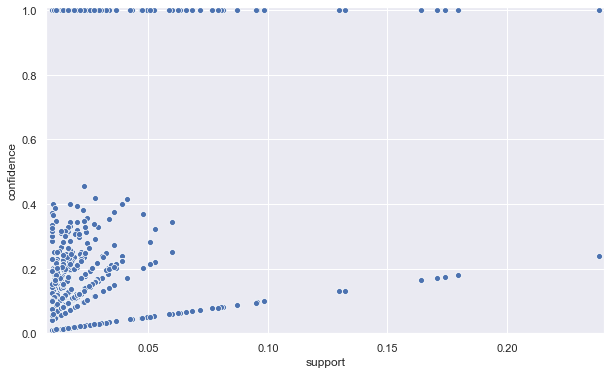

In [51]:
## Apply the Apriori algorithm with a support value of 0.0095
frequent_itemsets = apriori(onehot, min_support = 0.0095, 
                            use_colnames = True, max_len = 2)

# Generate association rules without performing additional pruning
rules = association_rules(frequent_itemsets, metric='support', 
                          min_threshold = 0.0)

# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", data = rules)
plt.margins(0.01,0.01)
plt.show()

Notice that the confidence-support border roughly forms a triangle. This suggests that throwing out some low support rules would also mean that we would discard rules that are strong according to many common metrics.

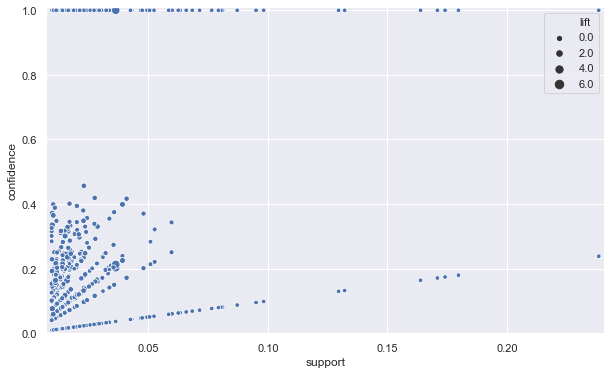

In [52]:
# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)
plt.margins(0.01,0.01)
plt.show()

If you look at the plot carefully, you'll notice that the highest values of lift are always at the support-confidence border for any given value of confidence.

In [53]:
# Function to convert rules to coordinates.
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

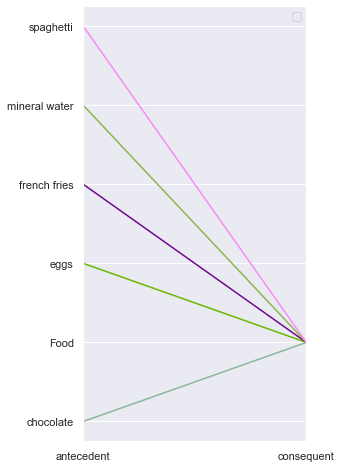

In [54]:
from pandas.plotting import parallel_coordinates

# Compute the frequent itemsets
frequent_itemsets = apriori(onehot, min_support = 0.15, 
                            use_colnames = True, max_len = 2)

# Compute rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric = 'confidence', 
                          min_threshold = 0.55)

# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(rules)

# Generate parallel coordinates plot
plt.figure(figsize=(4,8))
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.grid(True)
plt.show()

# Conclusion

As we have seen, the generation of rules is a very simple process, but very computationally expensive, since it grows exponentially with the increase of the set of items.

Overall, we seek the proper balance between support and confidence leading to a reasonable number of strong rules.

In the other hand, if the goal is to identify rare but with high confidence patterns, we should proceed as previously, by establishing a low level of support and a higher level of confidence, which leads to a large number of rules.

With this in mind, the rules with low support and high confidence would then be our target for further study and than outlining of strategies to raise cross selling.